<a href="https://colab.research.google.com/github/rajansingh387/projects/blob/main/customer_satisfaction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/gdrive/My Drive/cust_satisfaction_train.csv')


In [ ]:
test_df = pd.read_csv('/content/gdrive/My Drive/cust_satisfaction_test.csv')


In [ ]:
print(train_df.dtypes.value_counts())

int64      260
float64    111
dtype: int64


In [ ]:
print(type(train_df))
print(type(test_df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
test_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [ ]:
print(train_df.shape)
print(test_df.shape)

(76020, 371)
(75818, 370)


In [ ]:
nv= train_df.isnull().sum()
nv= nv[nv>0]

In [ ]:
print(nv)

Series([], dtype: int64)


In [ ]:
nv1= test_df.isnull().sum()
nv1= nv[nv>0]

In [ ]:
print(nv1)

Series([], dtype: int64)


In [ ]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [ ]:
!pip install pygwalker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pygwalker as pyg

In [ ]:
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [ ]:
a= train_df['TARGET'].value_counts()

<BarContainer object of 2 artists>

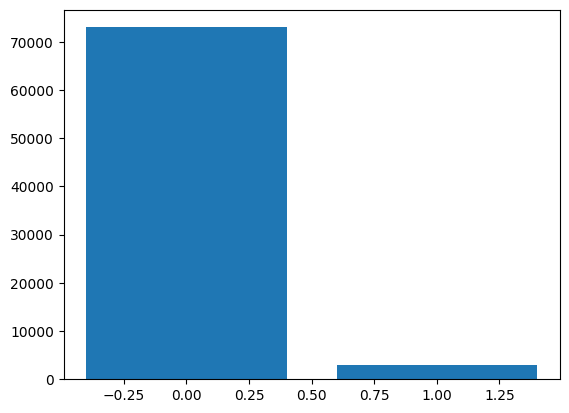

In [ ]:
plt.bar(a.index,a)

In [ ]:
b= train_df.nunique()
b= b[b==1]

In [ ]:
print(b)

ind_var2_0                       1
ind_var2                         1
ind_var27_0                      1
ind_var28_0                      1
ind_var28                        1
ind_var27                        1
ind_var41                        1
ind_var46_0                      1
ind_var46                        1
num_var27_0                      1
num_var28_0                      1
num_var28                        1
num_var27                        1
num_var41                        1
num_var46_0                      1
num_var46                        1
saldo_var28                      1
saldo_var27                      1
saldo_var41                      1
saldo_var46                      1
imp_amort_var18_hace3            1
imp_amort_var34_hace3            1
imp_reemb_var13_hace3            1
imp_reemb_var33_hace3            1
imp_trasp_var17_out_hace3        1
imp_trasp_var33_out_hace3        1
num_var2_0_ult1                  1
num_var2_ult1                    1
num_reemb_var13_hace

In [ ]:
for i in train_df.columns:
  if train_df[i].nunique()==1:
    print(i)
    train_df.drop(i,inplace= True, axis=1)
    test_df.drop(i,inplace= True, axis=1)


ind_var2_0
ind_var2
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var41
ind_var46_0
ind_var46
num_var27_0
num_var28_0
num_var28
num_var27
num_var41
num_var46_0
num_var46
saldo_var28
saldo_var27
saldo_var41
saldo_var46
imp_amort_var18_hace3
imp_amort_var34_hace3
imp_reemb_var13_hace3
imp_reemb_var33_hace3
imp_trasp_var17_out_hace3
imp_trasp_var33_out_hace3
num_var2_0_ult1
num_var2_ult1
num_reemb_var13_hace3
num_reemb_var33_hace3
num_trasp_var17_out_hace3
num_trasp_var33_out_hace3
saldo_var2_ult1
saldo_medio_var13_medio_hace3


In [ ]:
print(train_df.shape)
print(test_df.shape)

(76020, 337)
(75818, 336)


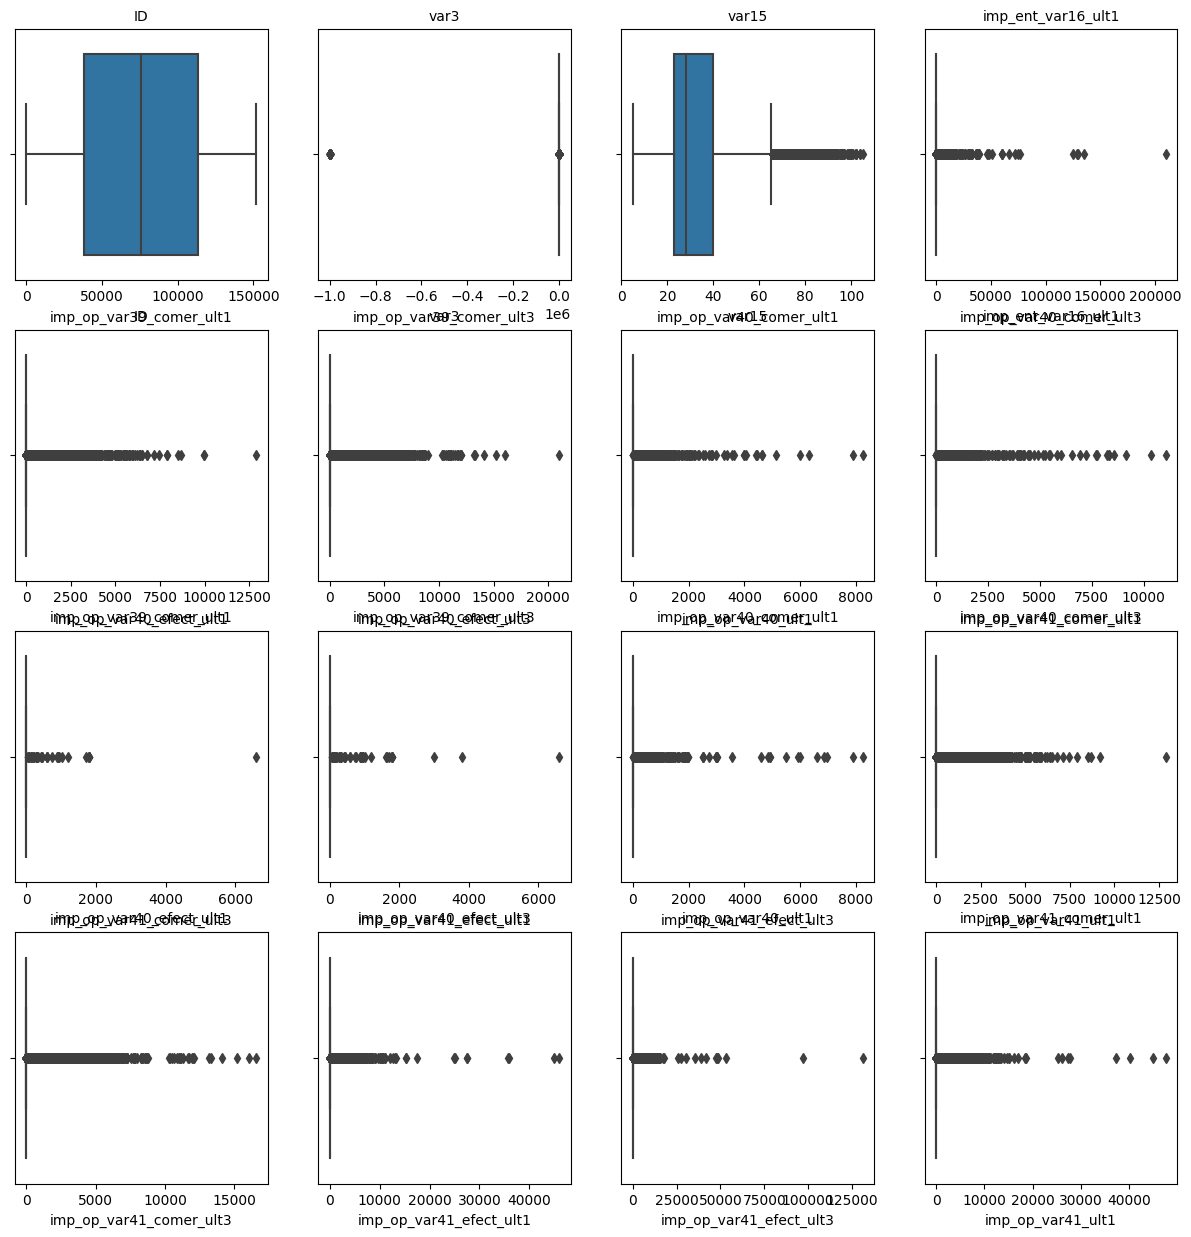

In [ ]:
plt.figure(figsize = (15,15))
for i in range(16):
    plt.subplot(4,4, i+1)
    sns.boxplot(x=train_df.iloc[:,i])   # detect outliers
    plt.title(train_df.columns[i], size = 10)
plt.show()

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,76020.0,75964.050723,43781.947379,1.00,38104.7500,76043.00,113748.7500,151838.00
var3,76020.0,-1523.199277,39033.462364,-999999.00,2.0000,2.00,2.0000,238.00
var15,76020.0,33.212865,12.956486,5.00,23.0000,28.00,40.0000,105.00
imp_ent_var16_ult1,76020.0,86.208265,1614.757313,0.00,0.0000,0.00,0.0000,210000.00
imp_op_var39_comer_ult1,76020.0,72.363067,339.315831,0.00,0.0000,0.00,0.0000,12888.03
...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace3,76020.0,1.858575,147.786584,0.00,0.0000,0.00,0.0000,24650.01
saldo_medio_var44_ult1,76020.0,76.026165,4040.337842,0.00,0.0000,0.00,0.0000,681462.90
saldo_medio_var44_ult3,76020.0,56.614351,2852.579397,0.00,0.0000,0.00,0.0000,397884.30
var38,76020.0,117235.809430,182664.598503,5163.75,67870.6125,106409.16,118756.2525,22034738.76


In [ ]:
test_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668953,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [ ]:
train_corr= train_df.corr()
print(train_corr)

                               ID      var3     var15  imp_ent_var16_ult1  \
ID                       1.000000 -0.001025 -0.002135           -0.003111   
var3                    -0.001025  1.000000 -0.004452            0.001868   
var15                   -0.002135 -0.004452  1.000000            0.043722   
imp_ent_var16_ult1      -0.003111  0.001868  0.043722            1.000000   
imp_op_var39_comer_ult1 -0.001436  0.005989  0.094762            0.041221   
...                           ...       ...       ...                 ...   
saldo_medio_var44_hace3 -0.003674  0.000508  0.018884           -0.000612   
saldo_medio_var44_ult1  -0.000856  0.000738  0.032833            0.005055   
saldo_medio_var44_ult3   0.000297  0.000778  0.033597            0.006590   
var38                   -0.005687  0.000071  0.006497            0.000007   
TARGET                   0.003148  0.004475  0.101322           -0.000017   

                         imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  

In [ ]:


def corr_func(dataframe,limit):
  col_corr= set()
  corr_matrix= dataframe.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if (corr_matrix.iloc[i,j])>limit:
        colname= corr_matrix.columns[i]
        col_corr.add(colname)
  return list(col_corr)

high_corr= corr_func(train_df,0.85)



In [ ]:
print(len(high_corr))

191


In [ ]:
train_df.drop(high_corr, inplace= True, axis= 1)

In [ ]:
test_df.drop(high_corr, inplace= True, axis= 1)

In [ ]:
train_df.shape

(76020, 146)

In [ ]:
test_df.shape

(75818, 145)

In [ ]:
train_df.drop('ID',inplace= True, axis= 1)

In [ ]:
test_df.drop('ID',inplace= True, axis= 1)

In [ ]:
x= train_df.drop('TARGET', axis= 1)
y= train_df['TARGET']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.30, random_state=20)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [ ]:
d = {'model':[],'TP':[],'FN':[],'FP':[],'TN':[],'Acc':[],'AUC':[]}


def eval_func(model, model_name,xtest,ytest,ypred):
  cm= confusion_matrix(ytest,ypred)
  print(cm)
  cr=classification_report(ytest,ypred,zero_division=0)
  print(cr)
  auc_score= roc_auc_score(ytest,model.predict_proba(xtest)[:,1])
  print(auc_score)
  ar= accuracy_score(ytest,ypred)
  print(ar)
  d['model'].append(model_name)
  d['TP'].append(cm[0,0])
  d['FN'].append(cm[0,1])
  d['FP'].append(cm[1,0])
  d['TN'].append(cm[1,1])
  d['Acc'].append(ar)
  d['AUC'].append(auc_score)


In [ ]:
def plot_roc_auc(model,ytest):
  fpr,tpr,thresh = roc_curve(ytest,model.predict_proba(xtest)[:,1])
  auc_score= roc_auc_score(ytest,model.predict_proba(xtest)[:,1])
  print('area under curve',auc_score)
  plt.plot(fpr,tpr,color='orange')
  plt.plot[0,1],[0,1]

In [ ]:
def plot_roc_auc(model,ytest):
    fpr,tpr,thresh = roc_curve(ytest,model.predict_proba(xtest)[:,1])
    auc_score = roc_auc_score(ytest,model.predict_proba(xtest)[:,1])
    print('Area Under Curve',auc_score)
    plt.plot(fpr,tpr,color='orange')
    plt.plot([0,1],[0,1],label='TPR=FPR')
    plt.title('ROC_AUC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    plt.legend()
    plt.show()   

In [ ]:
def mscore(model):
    print('Training Score',model.score(xtrain,ytrain))  # Training dataset Accuracy
    print('Testing Score',model.score(xtest,ytest)) 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=100000,solver='liblinear')
log_reg.fit(xtrain,ytrain)

LogisticRegression(max_iter=100000, solver='liblinear')

In [ ]:
mscore(log_reg)

Training Score 0.9599541474048183
Testing Score 0.9614575111812681


In [ ]:
# Generating prediction
ypred_logreg = log_reg.predict(xtest)
print(ypred_logreg)

[0 0 0 ... 0 0 0]


In [ ]:
eval_func(log_reg,'Log_Reg',xtest,ytest,ypred_logreg)

[[21927     2]
 [  877     0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.00      0.00      0.00       877

    accuracy                           0.96     22806
   macro avg       0.48      0.50      0.49     22806
weighted avg       0.92      0.96      0.94     22806

0.6077077141201992
0.9614575111812681


Area Under Curve 0.6077077141201992


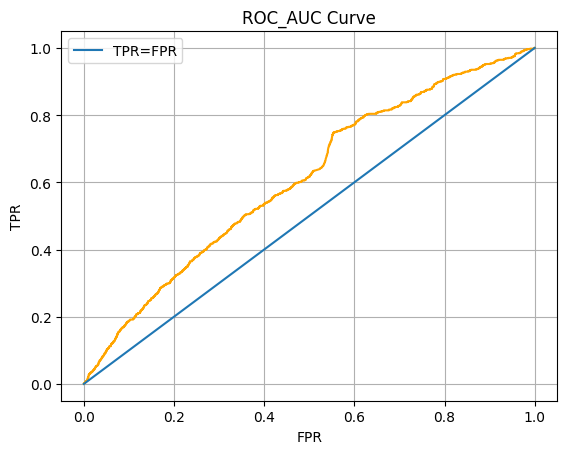

In [ ]:
plot_roc_auc(log_reg,ytest)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier(criterion= 'gini',min_samples_split=50 ,max_depth= 10)


In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_split=50)

In [ ]:
mscore(dt)

Training Score 0.9615702634645018
Testing Score 0.9604490046478997


In [ ]:
ypreddt= dt.predict(xtest)

In [ ]:
eval_func(dt,'dt',xtest,ytest,ypreddt)

[[21894    35]
 [  867    10]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.22      0.01      0.02       877

    accuracy                           0.96     22806
   macro avg       0.59      0.50      0.50     22806
weighted avg       0.93      0.96      0.94     22806

0.8131985037437863
0.9604490046478997


Area Under Curve 0.8131985037437863


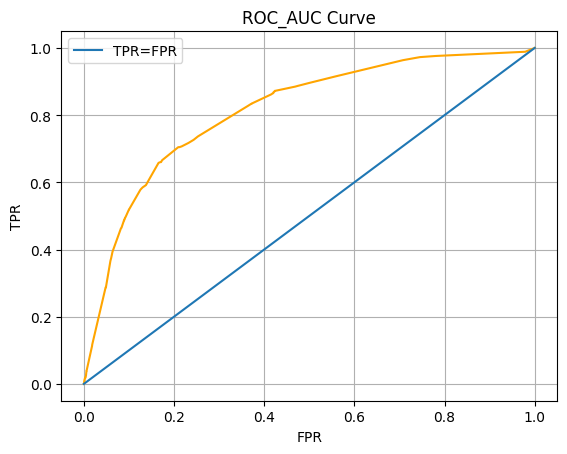

In [ ]:
plot_roc_auc(dt,ytest)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adab= AdaBoostClassifier(n_estimators=70)

In [ ]:
adab.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=70)

In [ ]:
mscore(adab)

Training Score 0.9599729394520239
Testing Score 0.9609313338595107


In [ ]:
ypredadab=adab.predict(xtest)

In [ ]:
eval_func(adab,'adab',xtest,ytest,ypredadab)

[[21910    19]
 [  872     5]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21929
           1       0.21      0.01      0.01       877

    accuracy                           0.96     22806
   macro avg       0.59      0.50      0.50     22806
weighted avg       0.93      0.96      0.94     22806

0.8243961425629194
0.9609313338595107


Area Under Curve 0.8243961425629194


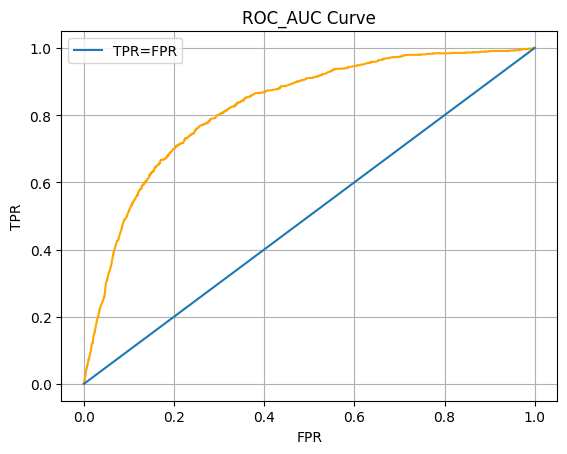

In [ ]:
plot_roc_auc(adab,ytest)

In [ ]:
print(d)

{'model': ['Log_Reg', 'dt', 'adab'], 'TP': [21927, 21894, 21910], 'FN': [2, 35, 19], 'FP': [877, 867, 872], 'TN': [0, 10, 5], 'Acc': [0.9614575111812681, 0.9604490046478997, 0.9609313338595107], 'AUC': [0.6077077141201992, 0.8131985037437863, 0.8243961425629194]}


In [ ]:
modelper= pd.DataFrame(d)

In [ ]:
modelper

,model,TP,FN,FP,TN,Acc,AUC
0,Log_Reg,21927,2,877,0,0.961458,0.607708
1,dt,21894,35,867,10,0.960449,0.813199
2,adab,21910,19,872,5,0.960931,0.824396


In [ ]:
model= AdaBoostClassifier(n_estimators= 70)

In [ ]:
model.fit(x,y)

AdaBoostClassifier(n_estimators=70)

In [ ]:
ypred= model.predict(test_df)

In [ ]:
sample = pd.read_csv('/content/gdrive/My Drive/sample_submission.csv')


In [ ]:
sample['TARGET']= ypred

In [ ]:
sample.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [ ]:
import pickle
pickle.dump(model,open('sat_predict.pkl','wb'))

In [ ]:
loaded_model= pickle.load(open('sat_predict.pkl','rb'))


In [ ]:
satisfaction_pred= loaded_model.predict(test_df)


In [ ]:
print(st)